In [ ]:
p**70*(1-p)**30

In [ ]:
# 分类
# 回归：拟合一个方程 f(x) = wX + b----------> w,b

In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.ensemble import GradientBoostingClassifier

from sklearn import tree

In [2]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn.predict_proba()

In [3]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()

clf.predict_proba()

In [4]:
gbdt = GradientBoostingClassifier()

gbdt.predict_proba()

In [7]:
np.exp(1)**2

7.3890560989306495

In [6]:
np.exp(2)

7.38905609893065

In [13]:
1 /(1 + np.exp(-50000000000000))

1.0

In [23]:
yi

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 1])

![](梯度提升二分类树_log.png)

In [14]:
xi = np.arange(1,11)

yi = np.array([0,0,0,1,1]*2)
display(xi,yi)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 1])

In [15]:
gbdt = GradientBoostingClassifier(n_estimators=3,max_depth=1)

gbdt.fit(xi.reshape(-1,1),yi)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=1,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=3,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [17]:
gbdt.estimators_.shape

(3, 1)

In [22]:
((yi - yi. mean())**2).mean()

0.24

In [21]:
np.var(yi)

0.24

### 第一颗决策树构建

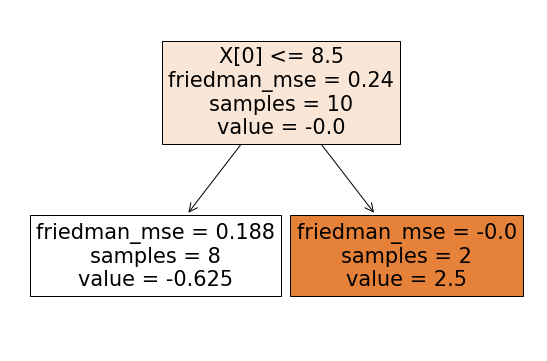

In [19]:
plt.figure(figsize=(9,6))
_ = tree.plot_tree(gbdt[0,0],filled=True)

计算$$F_0$$

In [24]:
F0 = np.log(4/6)
F0

-0.40546510810816444

计算$$\widetilde{y}_i$$

In [25]:
# 残差，概率，负梯度
yi_1 = yi - 1/(1 + np.exp(-F0))
yi_1

array([-0.4, -0.4, -0.4,  0.6,  0.6, -0.4, -0.4, -0.4,  0.6,  0.6])

In [ ]:
# s 3 0.3
# m 4 0.4
# l 3 0.3

In [31]:
# 计算每个裂分点mse
mse1 = []

for i in range(1,11):
    if i == 10:
        mse1.append(np.var(yi_1))
    else:
        mse1.append((np.var(yi_1[:i])*i + np.var(yi_1[i:])*(10 - i))/10)
        
print(np.round(mse1,4))
mse1 = np.asarray(mse1)
mse1

[0.2222 0.2    0.1714 0.225  0.24   0.2333 0.2095 0.15   0.2    0.24  ]


array([0.22222222, 0.2       , 0.17142857, 0.225     , 0.24      ,
       0.23333333, 0.20952381, 0.15      , 0.2       , 0.24      ])

![](gamma预测值.png)

In [34]:
# 两个分支，左边这个分支预测值
np.round(yi_1[:8].sum()/(((yi[:8] - yi_1[:8])*(1 - yi[:8] + yi_1[:8])).sum()),3)

-0.625

In [35]:
np.round(yi_1[8:].sum()/(((yi[8:] - yi_1[8:])*(1 - yi[8:] + yi_1[8:])).sum()),3)

2.5

In [37]:
gbdt[0,0].predict(xi.reshape(-1,1))

array([-0.625, -0.625, -0.625, -0.625, -0.625, -0.625, -0.625, -0.625,
        2.5  ,  2.5  ])

In [38]:
# 第一颗数据预测的值
y_1 = [-0.625]*8 + [2.5]*2
y_1 = np.asarray(y_1)
y_1

array([-0.625, -0.625, -0.625, -0.625, -0.625, -0.625, -0.625, -0.625,
        2.5  ,  2.5  ])

![](更新F_概率.png)

In [42]:
# 学习率 learning_rate = 0.1
F1 = F0 + y_1*0.1
F1.round(4)

array([-0.468 , -0.468 , -0.468 , -0.468 , -0.468 , -0.468 , -0.468 ,
       -0.468 , -0.1555, -0.1555])

In [45]:
# 残差，概率，负梯度
yi_2 = yi - 1/(1 + np.exp(-F1))
yi_2.round(4)

array([-0.3851, -0.3851, -0.3851,  0.6149,  0.6149, -0.3851, -0.3851,
       -0.3851,  0.5388,  0.5388])

### 拟合第二颗树

In [47]:
# 计算每个裂分点mse
mse2 = []

for i in range(1,11):
    if i == 10:
        mse2.append(np.var(yi_2))
    else:
        mse2.append((np.var(yi_2[:i])*i + np.var(yi_2[i:])*(10 - i))/10)
        
print(np.round(mse2,4))
mse2 = np.asarray(mse2)
# mse2

[0.2062 0.1856 0.1592 0.2105 0.2224 0.2187 0.1998 0.15   0.1904 0.2227]


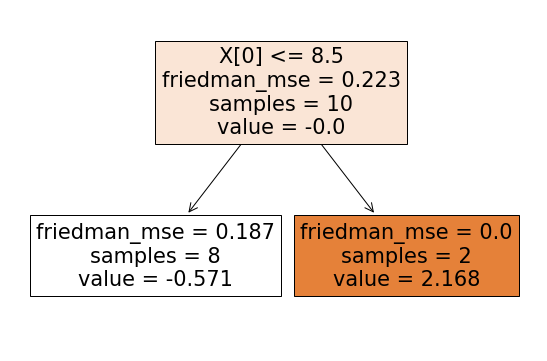

In [50]:
plt.figure(figsize=(9,6))
_ = tree.plot_tree(gbdt[1,0],filled=True)

In [51]:
# 两个分支，左边这个分支预测值
np.round(yi_2[:8].sum()/(((yi[:8] - yi_2[:8])*(1 - yi[:8] + yi_2[:8])).sum()),3)

-0.571

In [52]:
# 两个分支，左边这个分支预测值
np.round(yi_2[8:].sum()/(((yi[8:] - yi_2[8:])*(1 - yi[8:] + yi_2[8:])).sum()),3)

2.168